In [1]:
# Reference: https://scipy-lectures.org/intro/scipy/auto_examples/plot_fftpack.html 
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
freq1=1 #1Hz
time_step = 0.02
period1 = 1/freq1
time_vec = np.arange(0, 20, time_step)

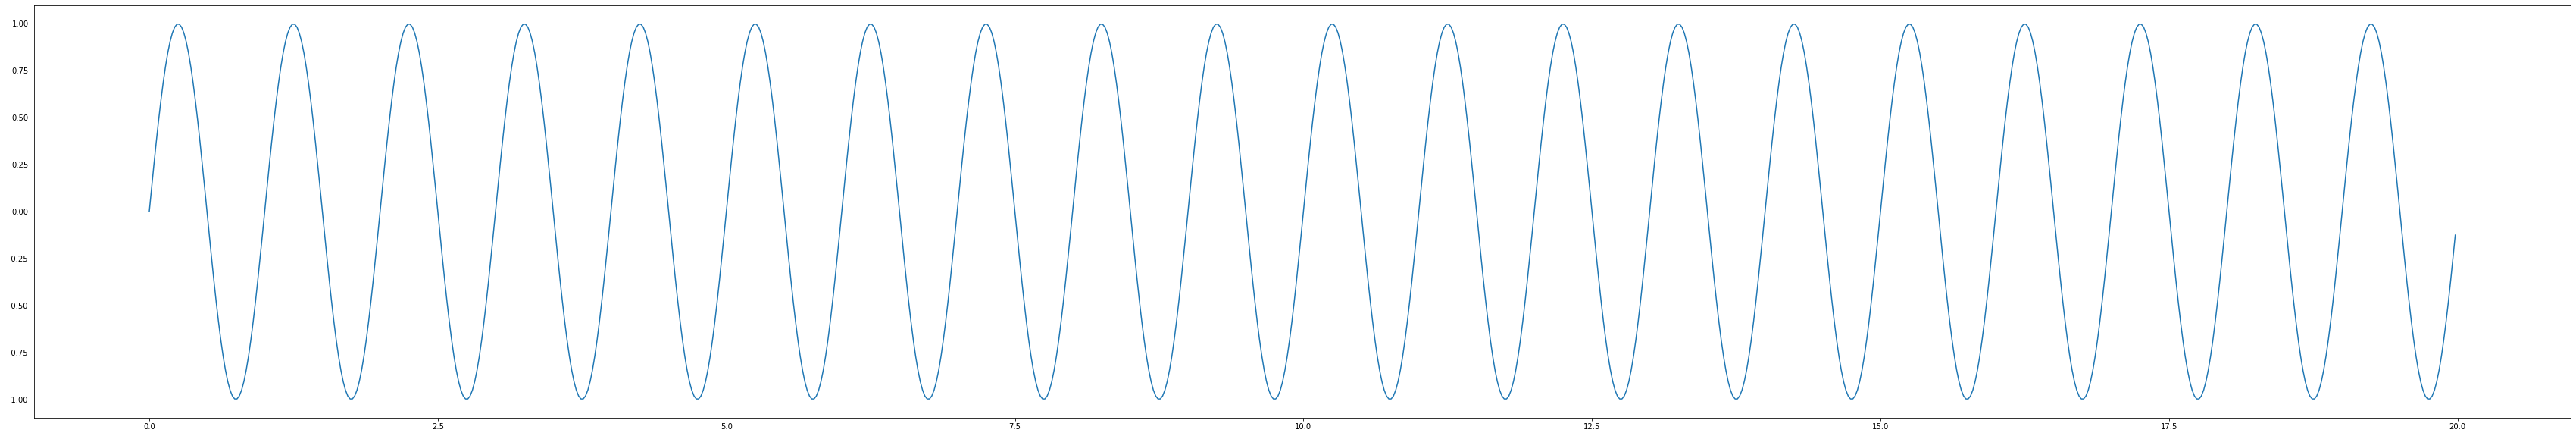

In [3]:
sig1 = (np.sin(2 * np.pi / period1 * time_vec))
plt.figure(figsize=(60, 10))
plt.plot(time_vec, sig1, label='Low Frequency')

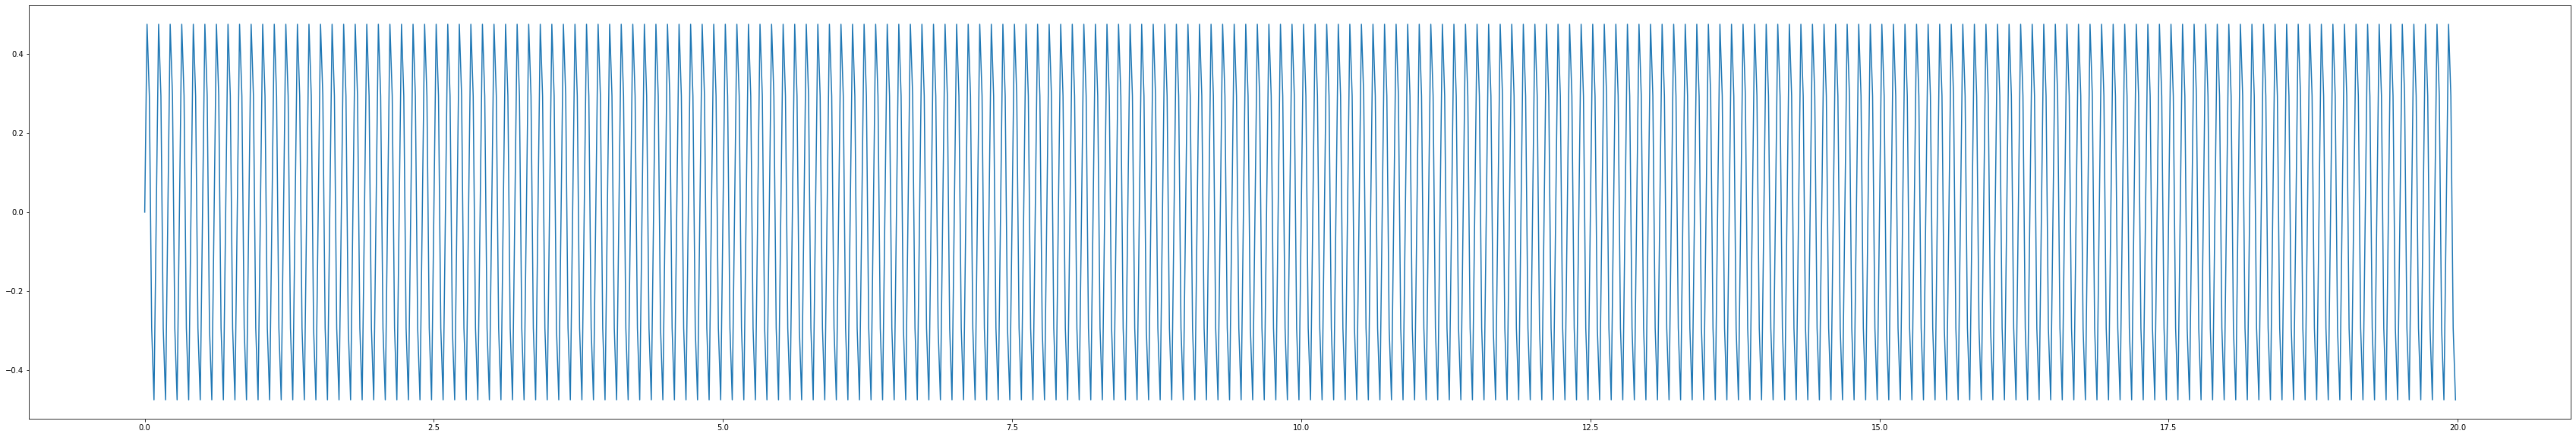

In [4]:
freq2=10 #10Hz
period2 = 1/freq2
noise_amplitude = 0.5
sig2 = noise_amplitude*(np.sin(2 * np.pi / period2 * time_vec))
plt.figure(figsize=(60, 10))
plt.plot(time_vec, sig2, label='High Frequency')

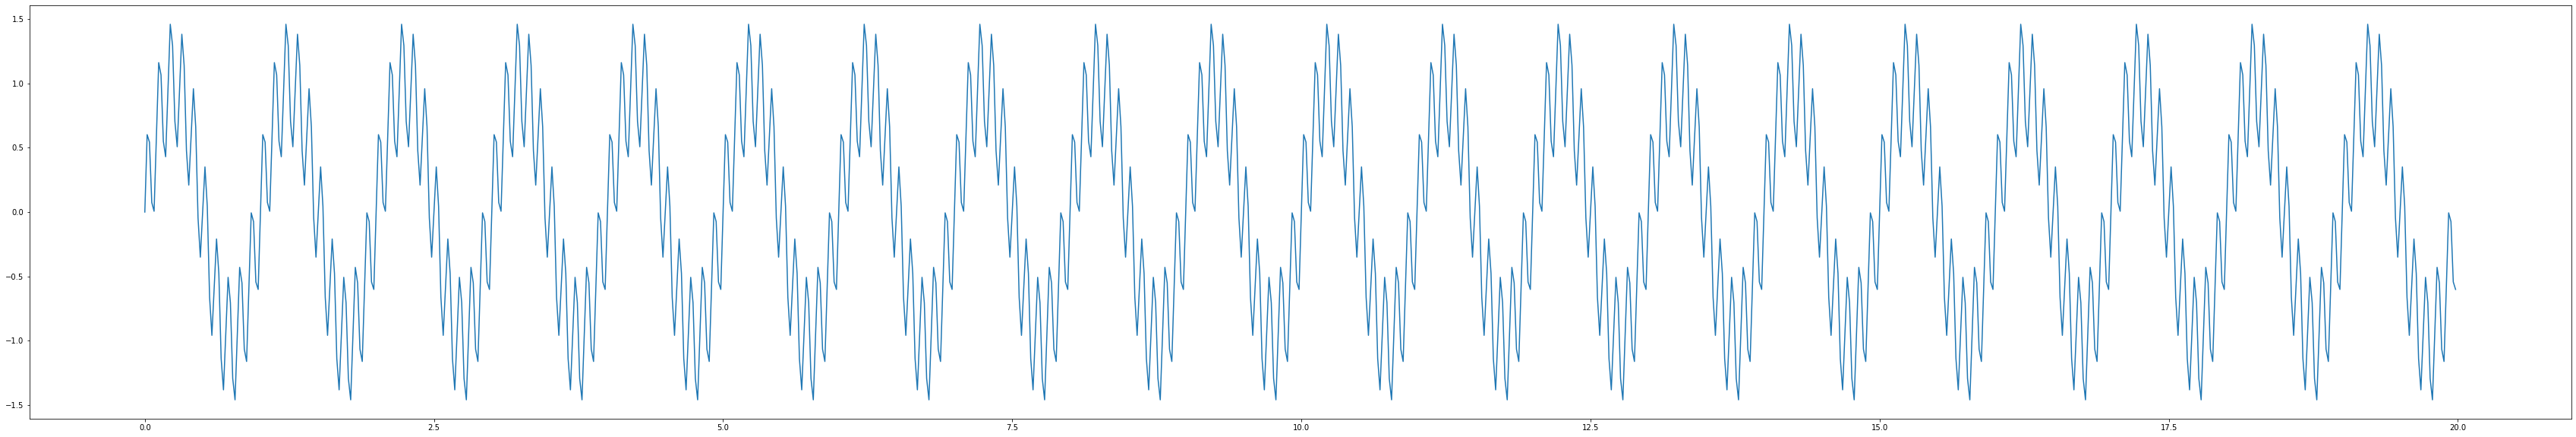

In [5]:
############################################################
# Generate the signal
############################################################
sig = sig1 + sig2
plt.figure(figsize=(60,10))
plt.plot(time_vec, sig, label='Low & High Frequency')

Text(0, 0.5, 'plower')

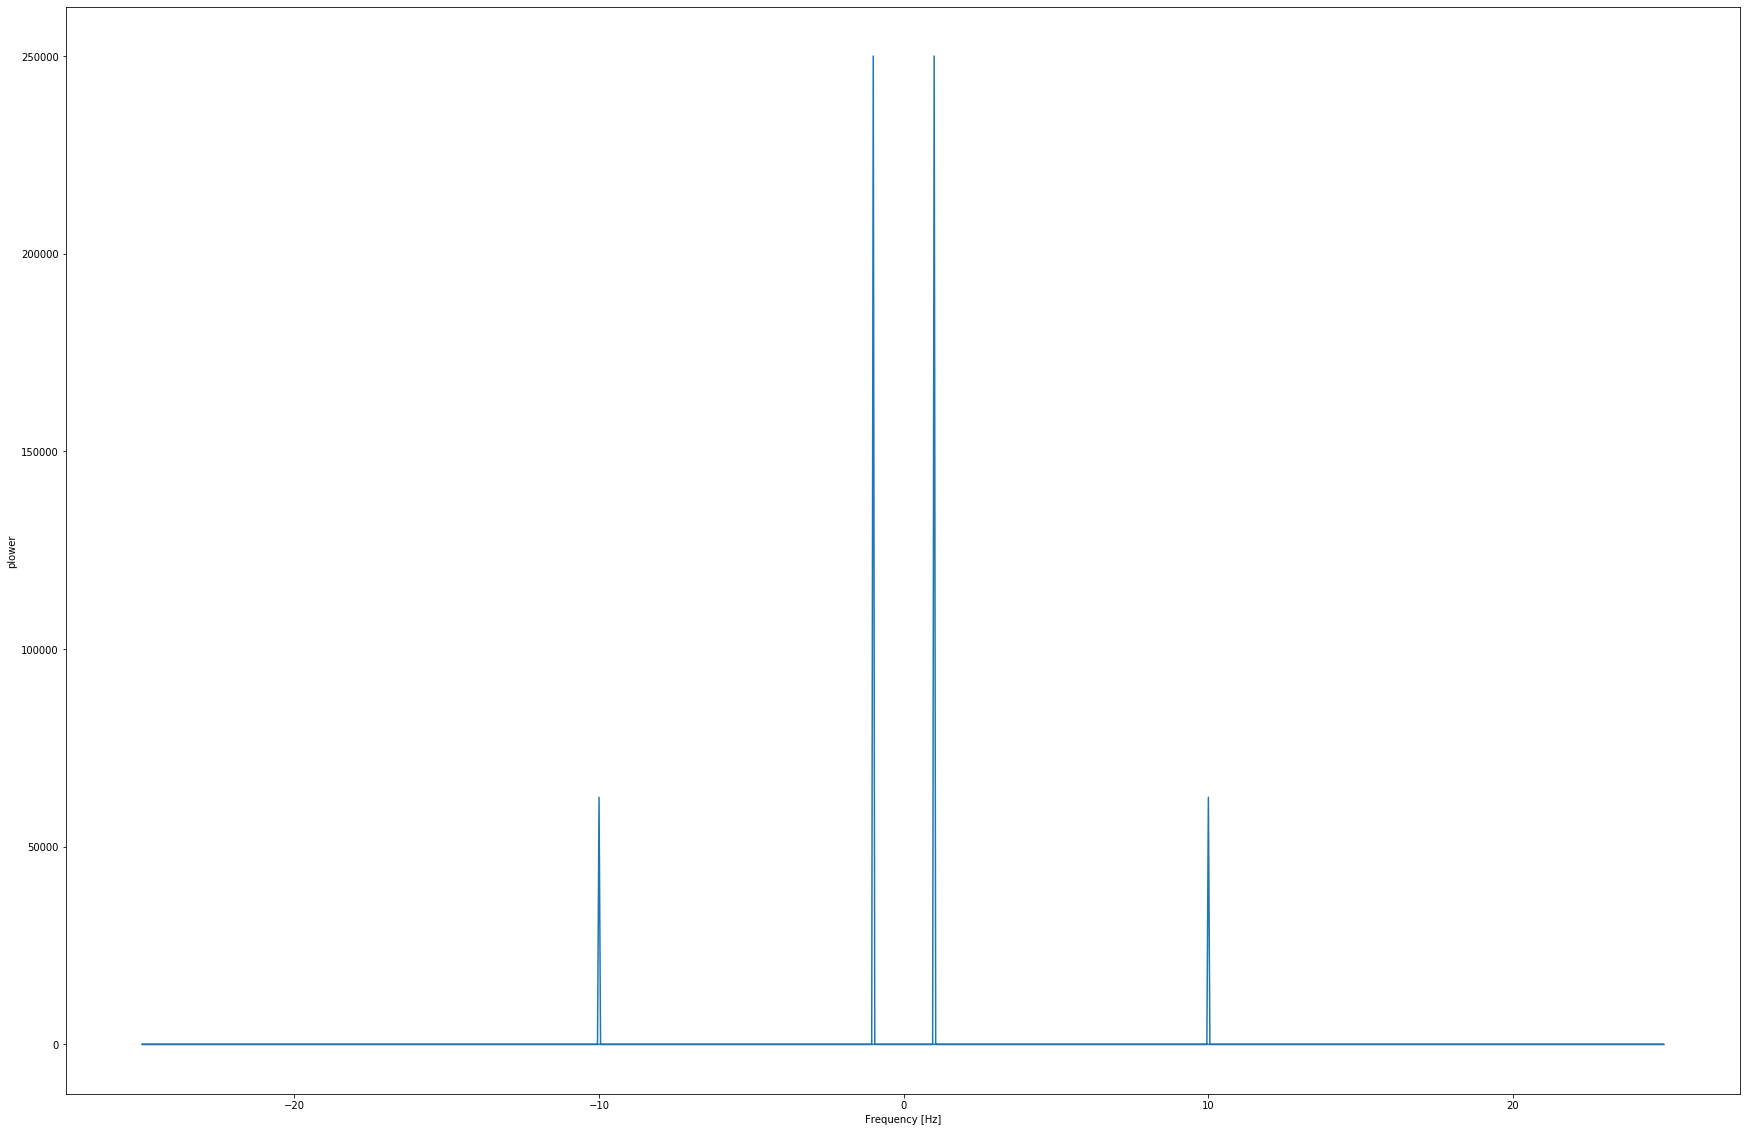

In [6]:
############################################################
# Compute and plot the power
############################################################
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(30, 20))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

In [7]:
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
peak_freq

1.0

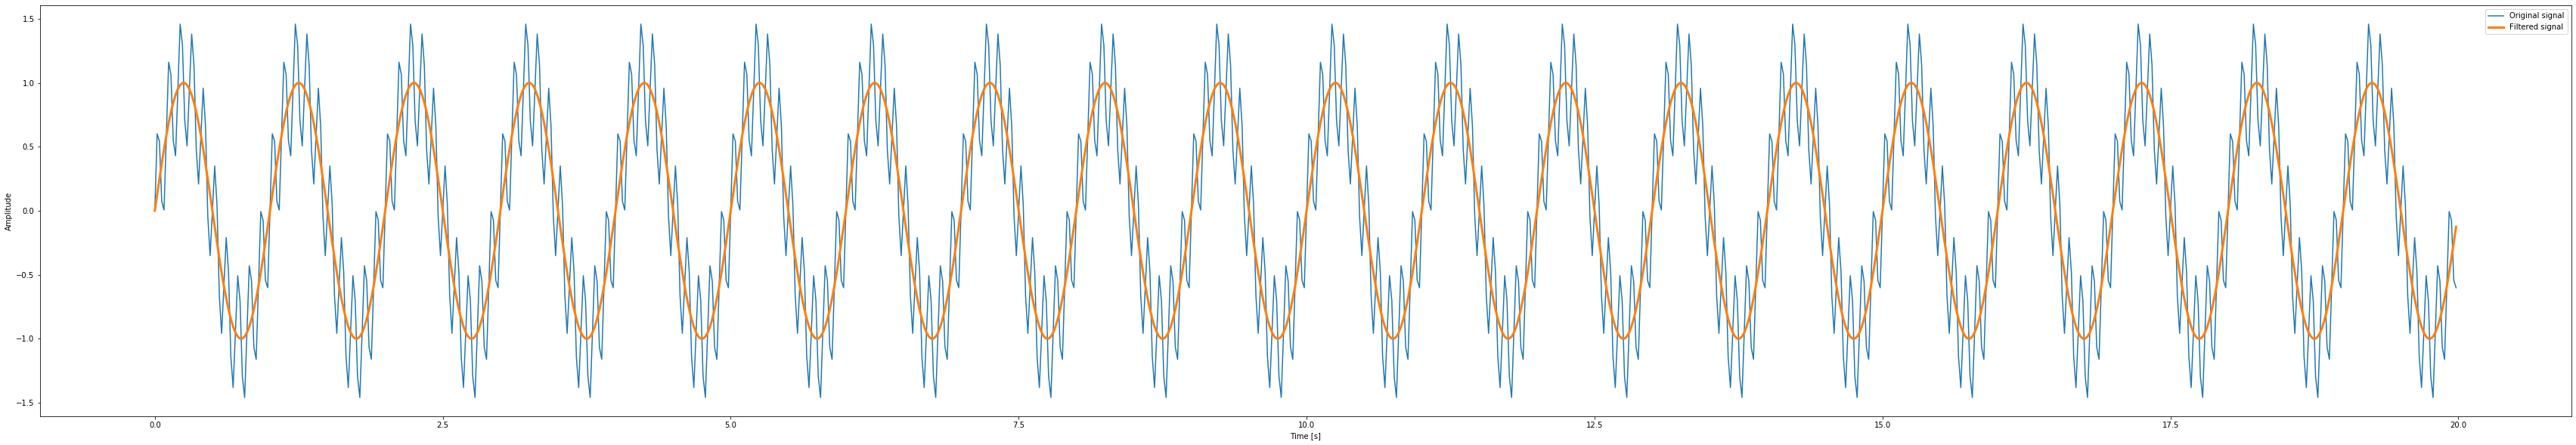

In [8]:
############################################################
# Remove all the high frequencies
############################################################
#
# We now remove all the high frequencies and transform back from
# frequencies to signal.

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(60,10))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

Text(0, 0.5, 'plower')

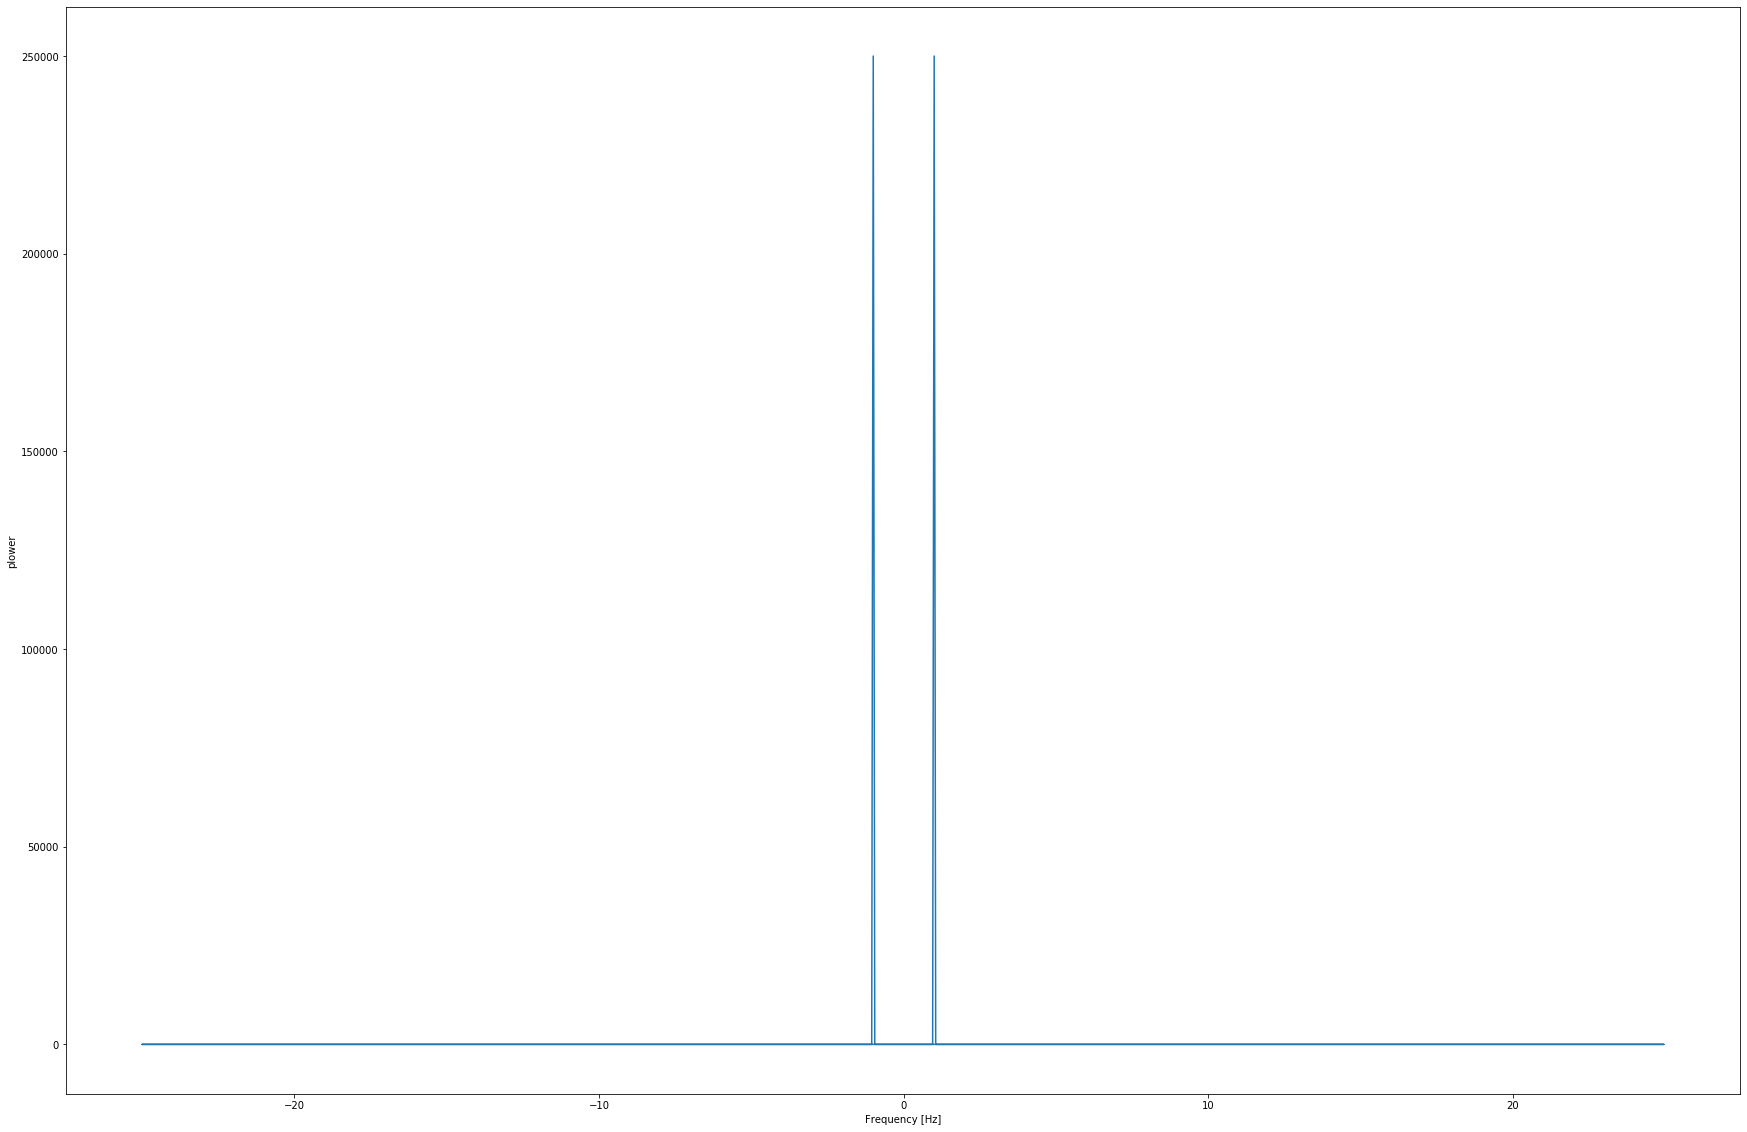

In [9]:
############################################################
# Double check: Re-Compute and plot the power
############################################################
#sig = filtered_sig
# The FFT of the signal
sig_fft1 = fftpack.fft(filtered_sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft1)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(filtered_sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(30, 20))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
# It should look very clean now

In [10]:
# Above was the demonstration using FFT and IFFT to filter out noise
# It is actually a better method to use scipy filter
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
from scipy import signal

In [11]:
t = time_vec
# Create an order 3 lowpass butterworth filter:
b, a = signal.butter(3, 0.05)

In [12]:
# Apply the filter to sig. Use lfilter_zi to choose the initial condition of the filter:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, sig, zi=zi*sig[0])

In [13]:
# Apply the filter again, to have a result filtered at an order the same as filtfilt:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

In [14]:
# Use filtfilt to apply the filter:
y = signal.filtfilt(b, a, sig)

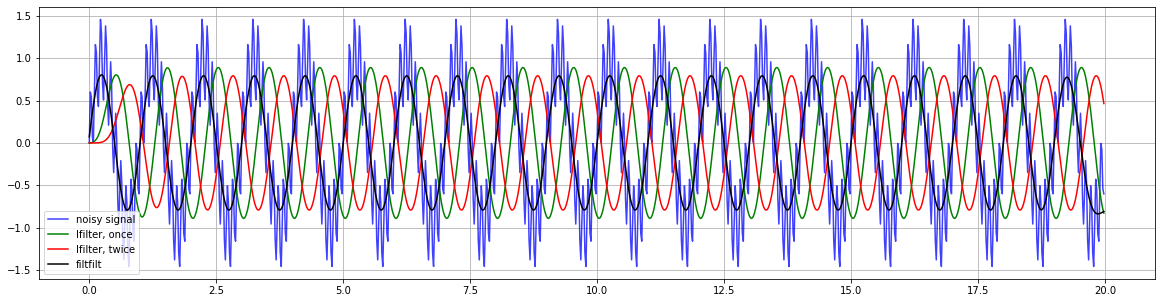

In [15]:
# Plot the original signal and the various filtered versions:
plt.figure(figsize=(20,5))
plt.plot(t, sig, 'b', alpha=0.75)
plt.plot(t, z, 'g', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice','filtfilt'), loc='best')
plt.grid(True)
plt.show()